<a href="https://colab.research.google.com/github/sweet30r/IcecreamORpizza/blob/main/IcecreamORpizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/dataset/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/dataset/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/dataset/train/icecream')))
print(len(os.listdir('/content/drive/MyDrive/dataset/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/icecream')))
print(len(os.listdir('/content/drive/MyDrive/dataset/test/pizza')))

505
421
59
47


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 741 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 186s 7s/step - accuracy: 0.6205 - loss: 0.8141 - val_accuracy: 0.8541 - val_loss: 0.3708
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.8301 - loss: 0.4049 - val_accuracy: 0.8378 - val_loss: 0.4221
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.8686 - loss: 0.3068 - val_accuracy: 0.8649 - val_loss: 0.3206
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.8955 - loss: 0.2553 - val_accuracy: 0.8378 - val_loss: 0.4786
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.8832 - loss: 0.2385 - val_accuracy: 0.8811 - val_loss: 0.2980
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.9319 - loss: 0.1672 - val_accuracy: 0.8108 - val_loss: 0.4593
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.9327 - loss: 0.2059 - val_accuracy: 0.8595 - val_loss: 0.3794
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.9738 - loss: 0.0828 - val_accuracy: 0.8270 - v

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.6113 - loss: 0.8597 - val_accuracy: 0.8000 - val_loss: 0.4758
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.8084 - loss: 0.4644 - val_accuracy: 0.6541 - val_loss: 0.6731
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.7649 - loss: 0.4892 - val_accuracy: 0.8595 - val_loss: 0.3584
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.8835 - loss: 0.2958 - val_accuracy: 0.8703 - val_loss: 0.3097
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9208 - loss: 0.1959 - val_accuracy: 0.8378 - val_loss: 0.3306
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.9250 - loss: 0.1980 - val_accuracy: 0.9081 - val_loss: 0.2842
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.9326 - loss: 0.1510 - val_accuracy: 0.8919 - val_loss: 0.2932
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.9406 - loss: 0.1368 - val_accuracy: 0.8703 - v

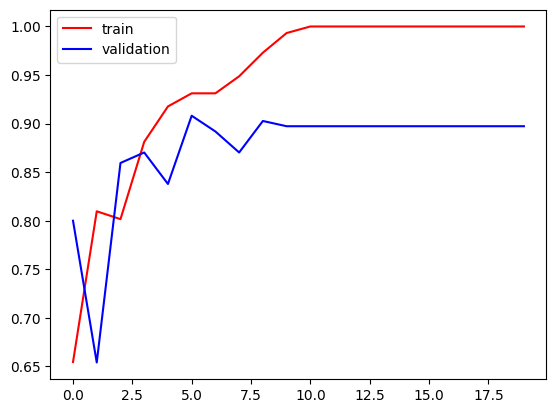

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

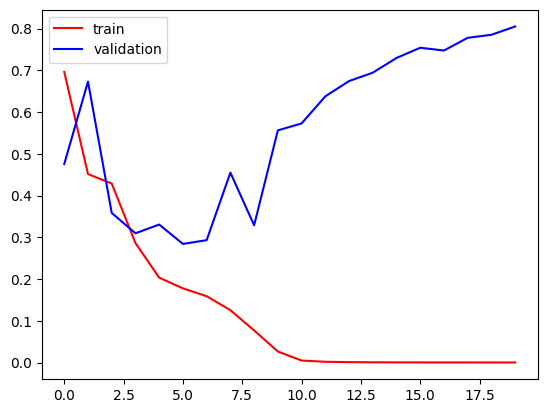

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[35 24]
 [22 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        59
           1       0.51      0.53      0.52        47

    accuracy                           0.57       106
   macro avg       0.56      0.56      0.56       106
weighted avg       0.57      0.57      0.57       106



In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 180s 7s/step - accuracy: 0.6718 - loss: 6.6855 - val_accuracy: 0.5568 - val_loss: 1.5951
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.8486 - loss: 3.2764 - val_accuracy: 0.4811 - val_loss: 3.2168
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 165s 7s/step - accuracy: 0.8557 - loss: 2.5508 - val_accuracy: 0.5459 - val_loss: 20.1489
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 164s 7s/step - accuracy: 0.8979 - loss: 1.4327 - val_accuracy: 0.5459 - val_loss: 29.7501
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 175s 7s/step - accuracy: 0.9127 - loss: 1.1532 - val_accuracy: 0.5459 - val_loss: 34.4454
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 193s 7s/step - accuracy: 0.9617 - loss: 0.4545 - val_accuracy: 0.5459 - val_loss: 24.8615
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 165s 7s/step - accuracy: 0.9472 - loss: 0.6552 - val_accuracy: 0.5405 - val_loss: 16.2978
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 175s 7s/step - accuracy: 0.9458 - loss: 0.4945 - val_accuracy: 0.545

In [ ]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 990ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[45 14]
 [38  9]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.54      0.76      0.63        59
           1       0.39      0.19      0.26        47

    accuracy                           0.51       106
   macro avg       0.47      0.48      0.45       106
weighted avg       0.48      0.51      0.47       106



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 199s 9s/step - accuracy: 0.6263 - loss: 0.8244 - val_accuracy: 0.7405 - val_loss: 0.6113
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 206s 9s/step - accuracy: 0.7520 - loss: 0.4723 - val_accuracy: 0.7676 - val_loss: 0.4775
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.7699 - loss: 0.4225 - val_accuracy: 0.6595 - val_loss: 0.7079
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 196s 8s/step - accuracy: 0.7932 - loss: 0.4294 - val_accuracy: 0.8162 - val_loss: 0.4165
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 197s 8s/step - accuracy: 0.8319 - loss: 0.3533 - val_accuracy: 0.8216 - val_loss: 0.4118
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 196s 8s/step - accuracy: 0.8363 - loss: 0.3306 - val_accuracy: 0.7622 - val_loss: 0.4493
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.8461 - loss: 0.3433 - val_accuracy: 0.8108 - val_loss: 0.4005
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 197s 8s/step - accuracy: 0.8845 - loss: 0.2933 - val_accuracy: 0.8270 - v

In [ ]:
predictions = resnet_model.predict(test_data)

3/4 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[30 29]
 [33 14]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49        59
           1       0.33      0.30      0.31        47

    accuracy                           0.42       106
   macro avg       0.40      0.40      0.40       106
weighted avg       0.41      0.42      0.41       106

